In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rashidahmadov","key":"6441d13127d997376a12321a07006658"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import shutil
shutil.move("kaggle.json", "/root/.kaggle/")

'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d START-UMD/gtd

Dataset URL: https://www.kaggle.com/datasets/START-UMD/gtd
License(s): other
gtd.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gtd.zip

Archive:  /content/gtd.zip
replace globalterrorismdb_0718dist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: globalterrorismdb_0718dist.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin1')

<ipython-input-7-5f101ec4aeb3>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin1')


In [ ]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [ ]:
attacks_by_year = df['iyear'].value_counts().sort_index()

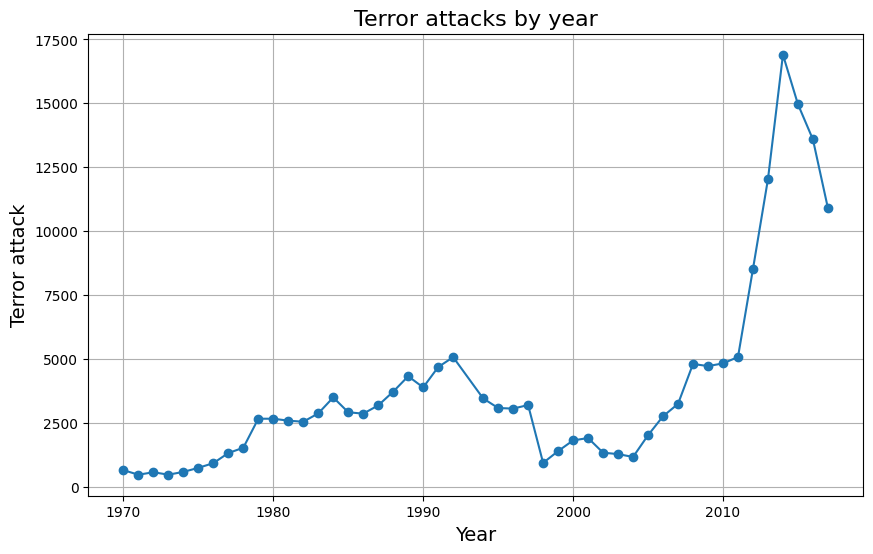

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(attacks_by_year.index, attacks_by_year.values, marker='o', linestyle='-')
plt.title('Terror attacks by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Terror attack', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
top_countries_by_year = df.groupby(['iyear', 'country_txt']).size().reset_index(name='attacks')
top_each_year = top_countries_by_year.loc[top_countries_by_year.groupby('iyear')['attacks'].idxmax()]
top_each_year.head()

,iyear,country_txt,attacks
29,1970,United States,468
61,1971,United States,247
101,1972,United Kingdom,292
142,1973,United Kingdom,189
191,1974,United Kingdom,203


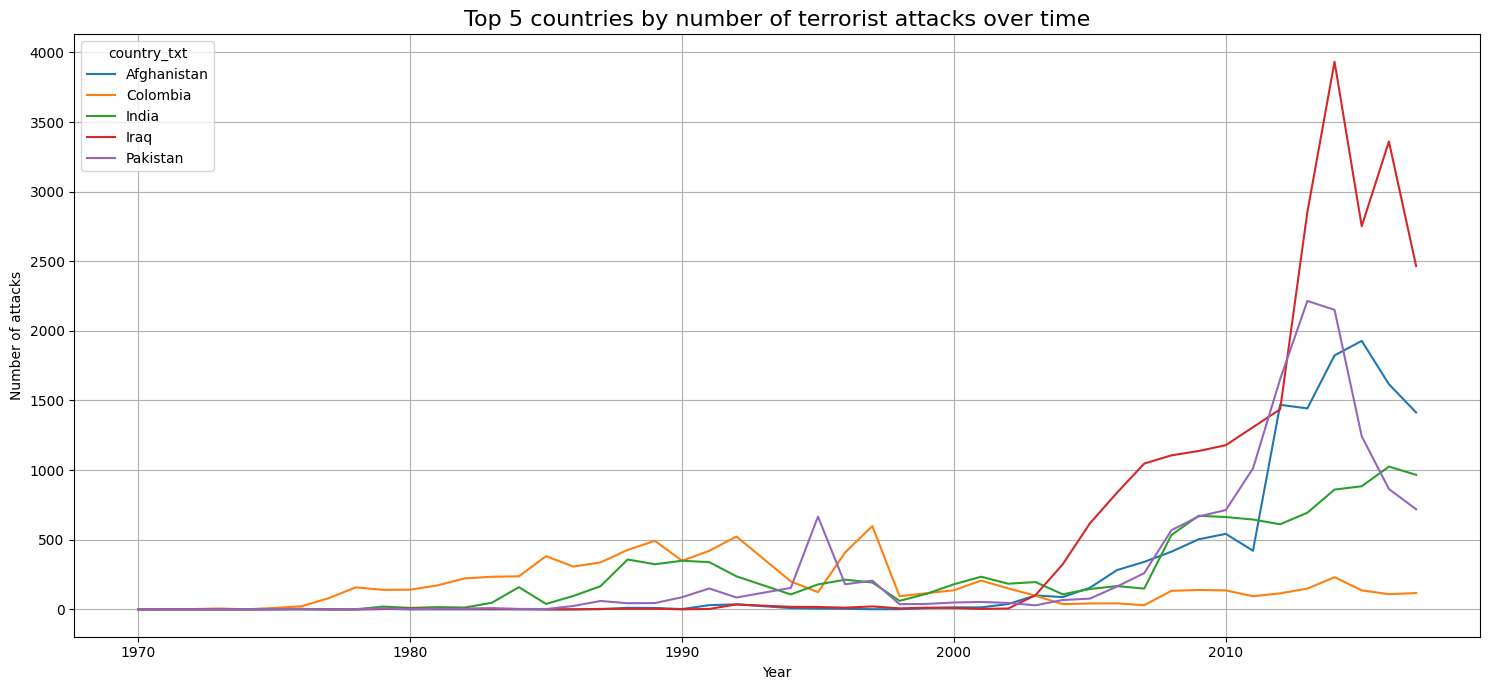

In [ ]:
top_5_countries = df['country_txt'].value_counts().head(5).index
trend_top_5 = df[df['country_txt'].isin(top_5_countries)].groupby(['iyear', 'country_txt']).size().unstack().fillna(0)
trend_top_5.plot(figsize=(15, 7))
plt.title('Top 5 countries by number of terrorist attacks over time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.grid(True)
plt.tight_layout()
plt.show()

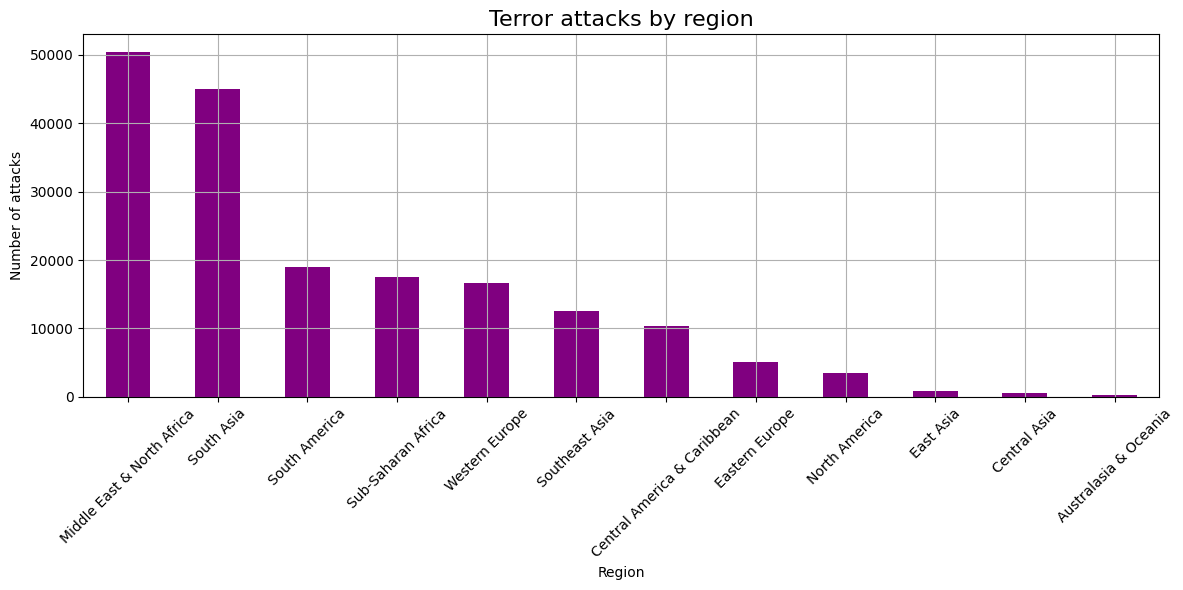

In [ ]:
region_attacks = df['region_txt'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
region_attacks.plot(kind='bar', color='purple')
plt.title('Terror attacks by region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

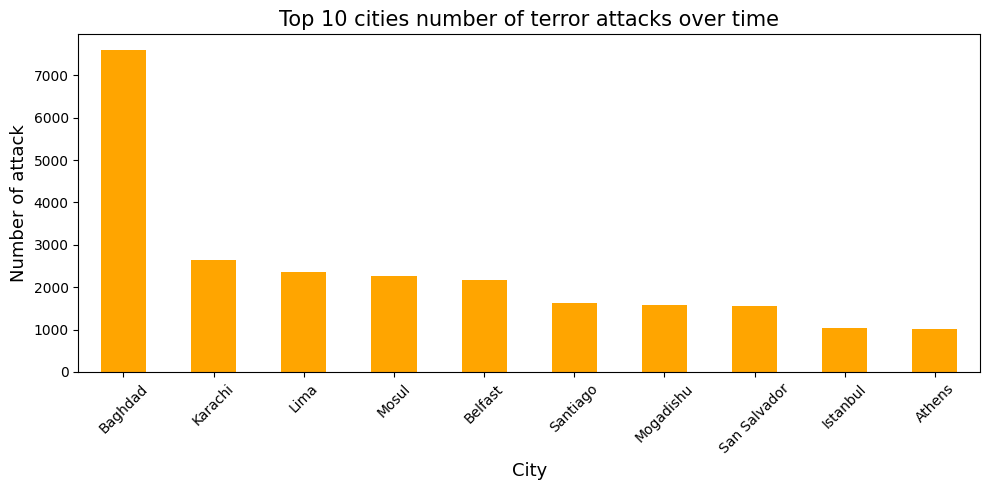

In [ ]:
top_cities = df['city'].value_counts().drop('Unknown').head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 cities number of terror attacks over time', fontsize=15)
plt.xlabel('City', fontsize=13)
plt.ylabel('Number of attack', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['nkill'] = pd.to_numeric(df['nkill'], errors='coerce')
df['nwound'] = pd.to_numeric(df['nwound'], errors='coerce')
df.dropna(subset=['nkill', 'nwound'], inplace=True)


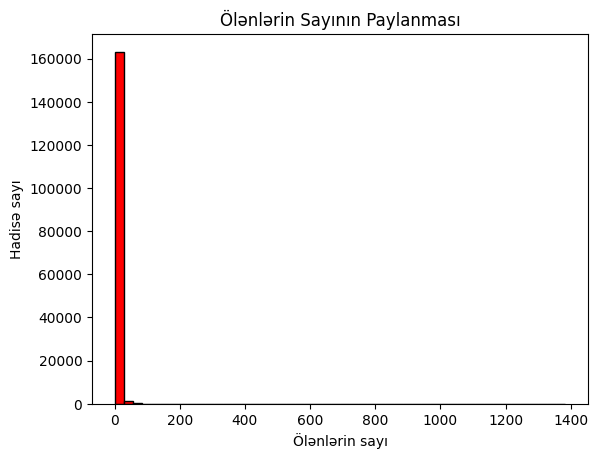

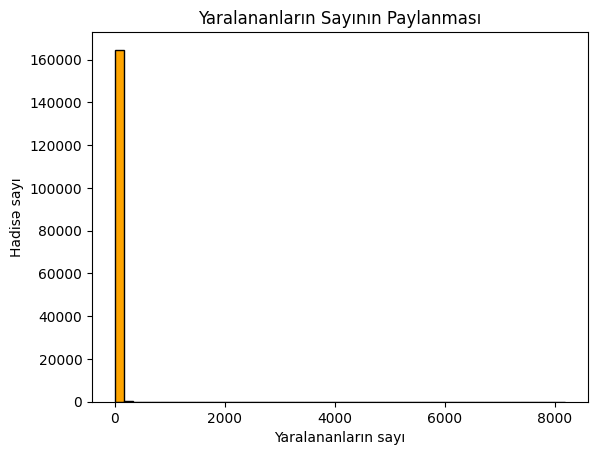

In [ ]:
plt.hist(df['nkill'], bins=50, color='red', edgecolor='black')
plt.title('Ölənlərin Sayının Paylanması')
plt.xlabel('Ölənlərin sayı')
plt.ylabel('Hadisə sayı')
plt.show()

plt.hist(df['nwound'], bins=50, color='orange', edgecolor='black')
plt.title('Yaralananların Sayının Paylanması')
plt.xlabel('Yaralananların sayı')
plt.ylabel('Hadisə sayı')
plt.show()

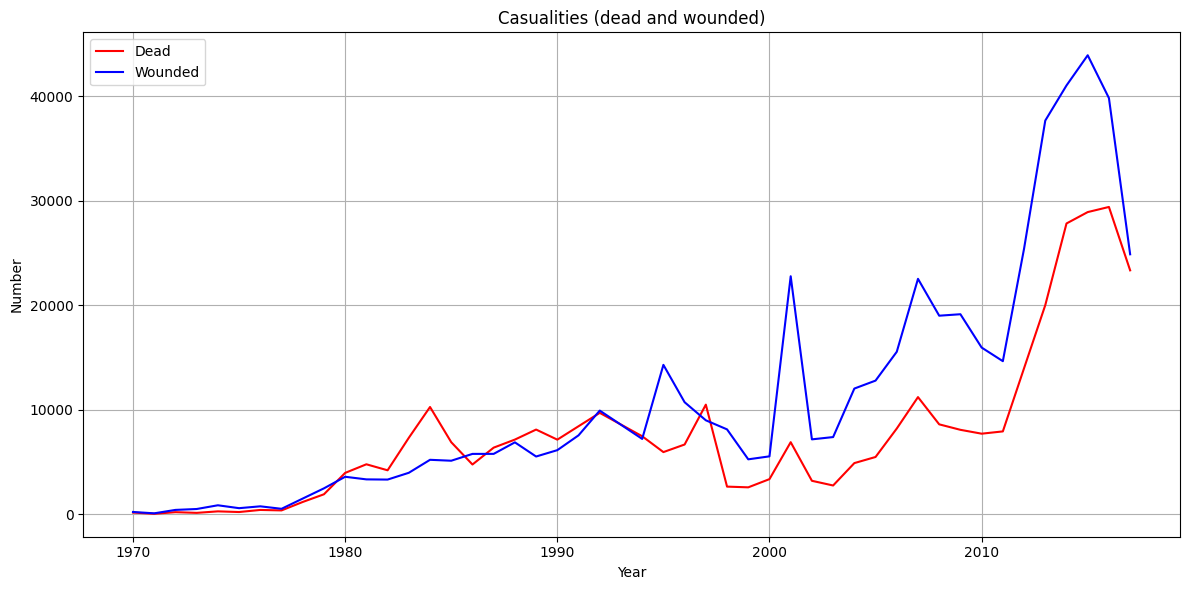

In [ ]:
deaths_per_year = df.groupby('iyear')['nkill'].sum()
wounds_per_year = df.groupby('iyear')['nwound'].sum()

plt.figure(figsize=(12,6))
plt.plot(deaths_per_year, label='Dead', color='red')
plt.plot(wounds_per_year, label='Wounded', color='blue')
plt.title('Casualities (dead and wounded)')
plt.xlabel('Year')
plt.ylabel('Number')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()